# Biomedical Data Science & AI

# Exercise sheet 8 - Introduction - Due date: 

Submitted to:

Mohamed Aborageh : s0moabor@uni-bonn.de

Vinay Srinivas Bharadhwaj: s0vibhar@uni-bonn.de

Yasamin Salimi: yasisali@uni-bonn.de

# Exercise 1 - Ensemble Learning (8 points)

1.	Inform yourself about gradient boosting, then answer the following questions in your own words: (2 points)


a.	What do the individual weak learners model? How does this relate to the gradient of the loss function?

- Individual weak learners are decision trees added in greedy manner which are combined to make composite model in a gradient descent strategy. Weak models are generated at every stage during learning process. They are constructed with split points based on purity scores (i.e., Gini, minimise loss). The contribution of each weak learner is based on minimising the overall error of the strong learner.





- When each learners is trained, it learnes to correct mistakes of previous models. In each gradient, the loss gradually decreases with each new learners. The gradient boosting approach trains learners based on minimising the loss function of a learner (i.e., training on the residuals of the model).

Reference: https://www.mygreatlearning.com/blog/gradient-boosting/

b.	What is the difference between gradient boosting and random forest?


<b>Two main differences are:</b>

- How trees are built: random forests builds each tree independently while gradient boosting builds one tree at a time which works in a forward stage-wise manner, introducing a weak learner to improve the shortcomings of existing weak learners.


- Combining results: random forests combine results at the end of the process (by averaging or "majority rules") while gradient boosting combines results along the way.



Reference: https://www.datasciencecentral.com/profiles/blogs/decision-tree-vs-random-forest-vs-boosted-trees-explained

2.	Which modifications make gradient boosting robust against overfitting? (1 point)


<b>Some ways to solve overfitting:</b>

- Use small learning rate

- Cross-validation to find out the number of boosting steps

- Regularization like Ridging

- By removing "confusing samples" - samples that are misclassified by a "perfect" Bayesian classifier.


<b>Refernce:</b> https://www.researchgate.net/publication/221112418_Avoiding_Boosting_Overfitting_by_Removing_Confusing_Samples

https://stats.stackexchange.com/questions/20714/does-ensembling-boosting-cause-overfitting

3.	Using the titanic_survival_dataset.csv, train the following models using nested cross validation while optimizing a selected number of hyperparameters in the inner loop using grid search, then compute the probabilities of your targets:


4.	Inform yourself about calibration curves (reliability diagrams). Use the predicted probabilities of each model from 3) to plot a calibration curve, then explain your results. (2 points)

In [23]:
import pandas as pd
import csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.calibration import calibration_curve
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from numpy import mean, std
from matplotlib import pyplot


file = pd.read_csv("titanic_survival_data.csv")
file.isna().any() #checking if any null values

features = file.drop(['Label', 'PassengerId'], axis = 1).values
labels = file['Label'].values
labels=labels.astype('int')

a.	Random forest, optimizing the number of estimators (1 point)


Accuracy: 0.807 (0.036)




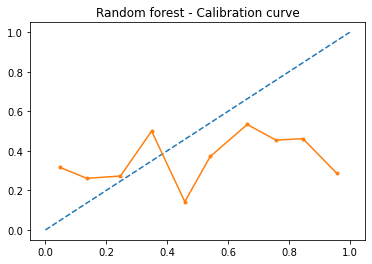

In [27]:
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

outer_acc = []
outer_prob = []

for train, test in cv_outer.split(features):
    X_train, X_test = features[train, :], features[test, :]
    y_train, y_test = labels[train], labels[test]
    
    
    # configure the cross-validation procedure
    cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
    
    model = RandomForestClassifier()
    params = {'n_estimators':[50, 100, 200, 250, 300]}
    
    gs = GridSearchCV(model, params, scoring='accuracy', cv=cv_inner)
    
    res = gs.fit(X_train, y_train)
    best_model = res.best_estimator_
    pred = best_model.predict(X_test)
    
    # evaluate the model
    acc = accuracy_score(y_test, pred)
    outer_acc.append(acc)
    
    prob = best_model.predict_proba(X_test)
    outer_prob.append(prob)
    
    
print('Accuracy: {:.3f} ({:.3f})'.format(mean(outer_acc), std(outer_acc)))
print('\n')
probability = mean([outer_prob[1], outer_prob[2]], axis = 0)[: ,1]
# reliability diagram
fop, mpv = calibration_curve(y_test, probability, n_bins=10, normalize=True)
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot model reliability
pyplot.plot(mpv, fop, marker='.')
pyplot.title("Random forest - Calibration curve")
pyplot.show()

b.	Gradient boosting, optimizing boosting steps (1 point)


Accuracy: 0.818 (0.036)




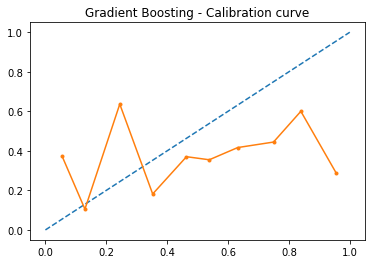

In [29]:
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

outer_acc = []
outer_prob = []

for train, test in cv_outer.split(features):
    X_train, X_test = features[train, :], features[test, :]
    y_train, y_test = labels[train], labels[test]
    
    
    # configure the cross-validation procedure
    cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
    
    model = GradientBoostingClassifier()
    params = {'learning_rate': [0.1,0.05,0.01,0.005,0.001],
             'n_estimators':[50, 100, 200, 250, 300]}
    
    gs = GridSearchCV(model, params, scoring='accuracy', cv=cv_inner)
    
    res = gs.fit(X_train, y_train)
    best_model = res.best_estimator_
    pred = best_model.predict(X_test)
    
    # evaluate the model
    acc = accuracy_score(y_test, pred)
    outer_acc.append(acc)
    
    prob = best_model.predict_proba(X_test)
    outer_prob.append(prob)
    
print('Accuracy: {:.3f} ({:.3f})'.format(mean(outer_acc), std(outer_acc)))
print('\n')
probability = mean([outer_prob[1], outer_prob[2]], axis = 0)[: ,1]
# reliability diagram
fop, mpv = calibration_curve(y_test, probability, n_bins=10, normalize=True)
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot model reliability
pyplot.plot(mpv, fop, marker='.')
pyplot.title("Gradient Boosting - Calibration curve")
pyplot.show()

c.	Lasso penalized logistic regression, optimizing L1 regularization strength (1 point)


Accuracy: 0.790 (0.029)




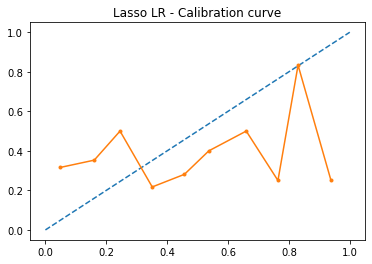

In [30]:
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

outer_acc = []
outer_prob = []

for train, test in cv_outer.split(features):
    X_train, X_test = features[train, :], features[test, :]
    y_train, y_test = labels[train], labels[test]
    
    
    # configure the cross-validation procedure
    cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
    
    model = LogisticRegression(penalty='l1', solver='liblinear')
    params = {'C' : [10, 1, 0.1, 0.05,0.01]}
    
    gs = GridSearchCV(model, params, scoring='accuracy', cv=cv_inner)
    
    res = gs.fit(X_train, y_train)
    best_model = res.best_estimator_
    pred = best_model.predict(X_test)
    
    # evaluate the model
    acc = accuracy_score(y_test, pred)
    outer_acc.append(acc)
    
    prob = best_model.predict_proba(X_test)
    outer_prob.append(prob)
    
print('Accuracy: {:.3f} ({:.3f})'.format(mean(outer_acc), std(outer_acc)))
print("\n")
probability = mean([outer_prob[1], outer_prob[2]], axis = 0)[: ,1]
# reliability diagram
fop, mpv = calibration_curve(y_test, probability, n_bins=10, normalize=True)
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot model reliability
pyplot.plot(mpv, fop, marker='.')
pyplot.title("Lasso LR - Calibration curve")
pyplot.show()

(Using a large parameter grid results in an extended computation time. We advise using a maximum of 5 values per hyperparameter)


# Exercise 2 - NN theoretical (10 points)

1.	Suppose there is a Multi-Layer Perceptron (MLP) composed of one input layer with 8 neurons, followed by one hidden layer with 30 artificial neurons, and one output layer with 3 artificial neurons. All artificial neurons use the ReLU activation function.

a.	Deduce the shape of input matrix X, hidden layer’s weight vector Wh, bias vector bh and the shape of the network’s output matrix Y. (2 points)


- Shape of input matrix X- 1 x 8

- Shape of hidden layer’s weight vector Wh – 8 x 30

- Shape of bias vector bh – 1 x 30

- Shape of output matrix Y - 1 x 3

b.	Write the equation that computes the network’s output matrix Y as a function of X, Wh , bh , Wo and bo. (2 points)

Y = X x Wh + bh

2.	What are principle and unavoidable limitations of the backpropagation (BP)? (1 point)



Backpropagation is used to train neural network. It is the method of fine – tuning the weights of a neural network based on error rate obtained in previous epoch.

<b>Prinicple:</b>

i. Inputs X, arrive through the preconnected path

ii. Input is modeled using real weights W. The weights are usually randomly selected.

iii. Calculate the output for every neuron from the input layer, to the hidden layers, to the output layer.

iv. Calculate the error in the outputs: Error = Actual output – Desired output

v. Travel back from the output layer to the hidden layer to adjust the weights such that the error is decreased.


<b>Limitations:</b>

i. The actual performance of backpropagation on a specific problem is dependent on the input data.

ii. Back propagation algorithm in data mining can be quite sensitive to noisy data

3.	The shown figure is a 3 layer neural network. 


a.	Compute h1, h2, o1, and total error using ReLU units. Note: b1, b2 and b3 represent the biases added to their respective units. (2 points)


b.	Calculate the updates of the network weights w1, …, w6 and bias terms b1, b2, b3 using backpropagation. Assume a learning rate of 1 for the sake of simplicity. Note: Remember that a bias term is equivalent to a weighted constant input 1. (3 points)


# Exercise 3 - NN Programming (7 points)

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tflearn.data_utils import load_csv
from sklearn.model_selection import train_test_split 
import tflearn
from tflearn.datasets import titanic
from __future__ import absolute_import, division, print_function, unicode_literals
import glob
import os 
import tensorflow as tf
tf.keras.backend.clear_session()
from tensorflow.keras import layers
from tensorflow import keras
tf.keras.__version__
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter(action='ignore')

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

Instructions for updating:
non-resource variables are not supported in the long term


1.	Familiarize yourself with tensorflow and train a neural network with 2 hidden layers (10 and 8 units respectively) and predict the label feature using the titanic_survival_dataset.csv dataset. (2 points)

In [2]:
df = pd.read_csv("titanic_survival_data.csv")

df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,no_cabin,Label
0,1,3,0,22.0,1,0,7.2500,0,2,0
1,2,1,1,38.0,1,0,71.2833,1,1,1
2,3,3,1,26.0,0,0,7.9250,0,2,1
3,4,1,1,35.0,1,0,53.1000,0,1,1
4,5,3,0,35.0,0,0,8.0500,0,2,0


In [3]:
X_train = df.drop("Label", axis=1)
y_train = df["Label"]
X_test  = df.drop("PassengerId", axis=1).copy()

In [4]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 17))
model.add(Dense(10, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'sigmoid'))

# summary
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 144       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 45        
Total params: 367
Trainable params: 367
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Compiling the NN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the NN
model.fit(X_train, y_train, batch_size = 32, epochs = 200)

ValueError: Error when checking input: expected dense_input to have shape (17,) but got array with shape (9,)

In [6]:
y_pred = model.predict(X_test)
y_final = (y_pred > 0.5).astype(int).reshape(X_test.shape[0])

output = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Label': y_final})

ValueError: Error when checking input: expected dense_input to have shape (17,) but got array with shape (9,)

2.	Evaluate the performance of the neural network for the same dataset in a nested cross validation by optimizing the number of units in the 2nd hidden layer in the inner cross validation. (3 points)

In [7]:
df = pd.read_csv("titanic_survival_data.csv")

df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,no_cabin,Label
0,1,3,0,22.0,1,0,7.2500,0,2,0
1,2,1,1,38.0,1,0,71.2833,1,1,1
2,3,3,1,26.0,0,0,7.9250,0,2,1
3,4,1,1,35.0,1,0,53.1000,0,1,1
4,5,3,0,35.0,0,0,8.0500,0,2,0


In [8]:
df["no_cabin"] = df["no_cabin"].fillna("Unknown")
df['Embarked'] = df['Embarked'].fillna('Unknown')

In [9]:
file = 'titanic_survival_data.csv'
def import_data():
    columns = ['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare',
           'Embarked','no_cabin','Label']
    data = np.zeros((1, len(columns)))
    data = np.vstack((data, np.genfromtxt(file, delimiter=',')))
    data = data[1:]
    return pd.DataFrame(data=data, columns=columns, index=None)

In [10]:
columns = ['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare',
           'Embarked','no_cabin','Label']

for column in columns:
    df[column] = df[column].replace(0, np.NaN)
    mean = int(df[column].mean(skipna = True))
    df[column] = df[column].replace(np.NaN, mean)

df = import_data()
X = np.array(df.drop(['Label'], axis=1).values.tolist())
y = np.array(df.Label.values).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [11]:
def keras_seq_model_two_ten_eight(optimizer='rmsprop', init='glorot_uniform'):
    model = tf.keras.Sequential()
    # Adds a densely-connected layer with 9 units to the model:
    model.add(layers.Dense(9, input_dim=9, 
                           kernel_initializer=init, activation='relu'))

    #One "hidden layer" with 10 units
    model.add(layers.Dense(10, activation='relu'))
    
    #add second hidden layer with 8 units
    model.add(layers.Dense(8, activation='relu'))
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
        
    # Add a softmax layer with 5 output units:
    model.add(layers.Dense(5, activation='softmax'))
    
    return model

def keras_seq_model(optimizer='rmsprop', init='glorot_uniform', hlayer_count=2):
    model = tf.keras.Sequential()
    model.add(layers.Dense(units=9, input_dim=9, 
                           kernel_initializer=init, activation='relu'))

    #Add hidden layers 
    for i in range(hlayer_count):
        model.add(layers.Dense(10, activation='relu'))
        model.add(layers.Dense(8, activation='relu'))
        model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
        
    # Add a softmax layer with 5 output units:
    model.add(layers.Dense(5, activation='softmax'))
    
    return model

In [12]:
model = KerasClassifier(build_fn=keras_seq_model_two_ten_eight, verbose=0)
# define the grid search parameters
optimizers = ['rmsprop', 'adam']
batch_size = [5, 10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100, 150]
param_grid = dict(optimizer=optimizers, batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.652355 using {'batch_size': 5, 'epochs': 150, 'optimizer': 'rmsprop'}
0.618798 (0.035700) with: {'batch_size': 5, 'epochs': 10, 'optimizer': 'rmsprop'}
0.580767 (0.041441) with: {'batch_size': 5, 'epochs': 10, 'optimizer': 'adam'}
0.646762 (0.068117) with: {'batch_size': 5, 'epochs': 50, 'optimizer': 'rmsprop'}
0.557277 (0.069865) with: {'batch_size': 5, 'epochs': 50, 'optimizer': 'adam'}
0.615442 (0.032876) with: {'batch_size': 5, 'epochs': 100, 'optimizer': 'rmsprop'}
0.633339 (0.051324) with: {'batch_size': 5, 'epochs': 100, 'optimizer': 'adam'}
0.652355 (0.075421) with: {'batch_size': 5, 'epochs': 150, 'optimizer': 'rmsprop'}
0.624391 (0.041199) with: {'batch_size': 5, 'epochs': 150, 'optimizer': 'adam'}
0.612087 (0.030533) with: {'batch_size': 10, 'epochs': 10, 'optimizer': 'rmsprop'}
0.622154 (0.038899) with: {'batch_size': 10, 'epochs': 10, 'optimizer': 'adam'}
0.631102 (0.048681) with: {'batch_size': 10, 'epochs': 50, 'optimizer': 'rmsprop'}
0.605375 (0.027752) with: {'

3.	How does the neural network perform in comparison to the models in the calibration curve from the previous task and plot the results alongside the other models in the calibration plot? (2 points)

In [13]:
df = pd.read_csv("titanic_survival_data.csv")
df.isnull().values.any()

False

In [14]:
columns = ['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare',
           'Embarked','no_cabin','Label']

for column in columns:
    df[column] = df[column].replace(0, np.NaN)
    mean = int(df[column].mean(skipna = True))
    df[column] = df[column].replace(np.NaN, mean)

In [15]:
df = import_data()
df = df.reset_index()
df = df.dropna()

X = np.array(df.drop(['Label'], axis=1).values.tolist())
y = np.array(df.Label.values).reshape(-1,1)


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [16]:
print(np.any(np.isnan(X_train)),np.all(np.isfinite(X_train)))

False True


In [17]:
R = LogisticRegression(penalty = 'l1', random_state=0, solver='liblinear', l1_ratio = None)
R.fit(X_train, y_train)

LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [18]:
Clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=1, random_state=0)
Clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [19]:
classifier = RandomForestClassifier(n_estimators = 50, verbose=0, criterion='entropy', n_jobs=-1)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, n_jobs=-1)

In [37]:
Model = Sequential()
Model.compile(optimizer='rmsprop',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
Model.fit(X_train, y_train)

Train on 713 samples
713/713 [==============================] - 0s 279us/sample - loss: 3.6582 - acc: 0.0000e+00


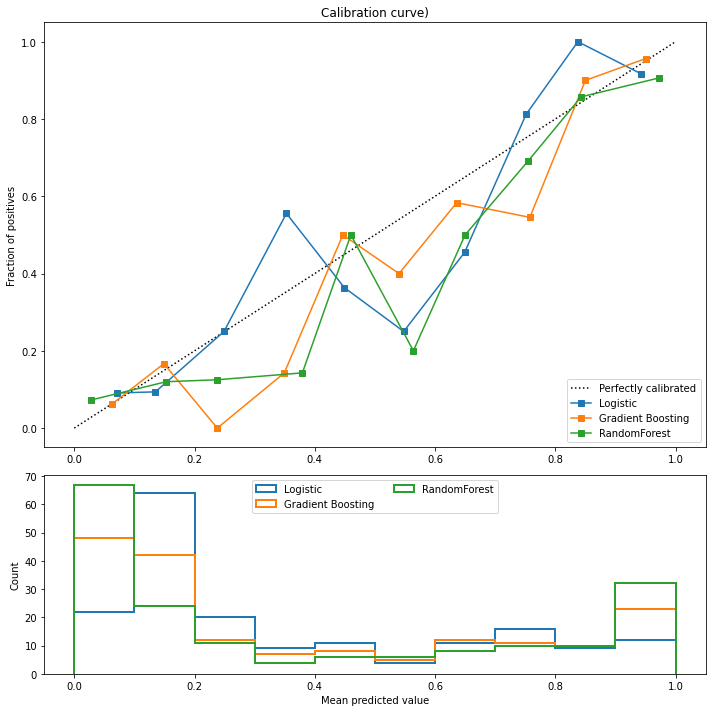

In [40]:
plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(R, 'Logistic'),
                  (Clf, 'Gradient Boosting'), (classifier, 'RandomForest')]:
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

Train on 713 samples
713/713 [==============================] - 0s 110us/sample - loss: 3.6582 - acc: 0.0000e+00


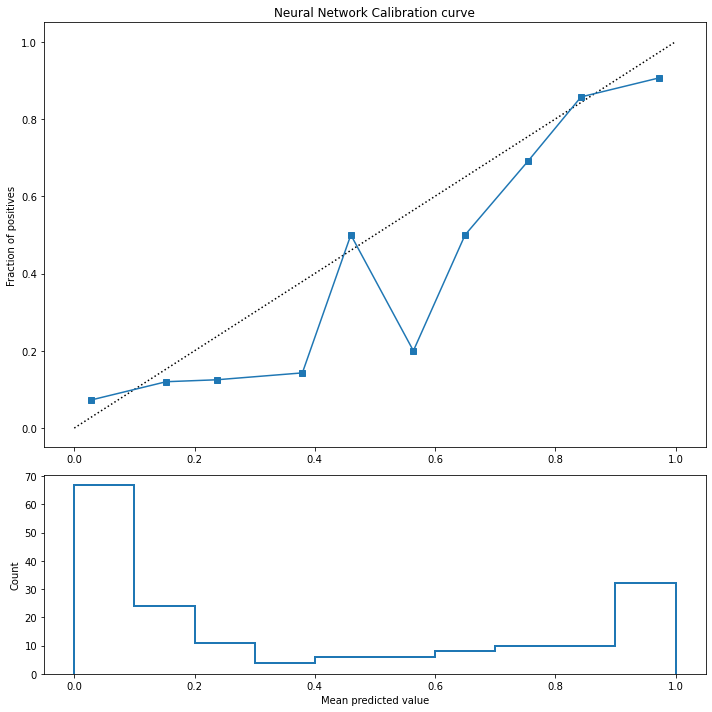

In [42]:
plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

Model = Sequential()
Model.compile(optimizer='rmsprop',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
Model.fit(X_train, y_train)
if hasattr(clf, "predict_proba"):
    prob_pos = clf.predict_proba(X_test)[:, 1]
else:  # use decision function
    prob_pos = clf.decision_function(X_test)
    prob_pos = \
    (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
fraction_of_positives, mean_predicted_value = \
calibration_curve(y_test, prob_pos, n_bins=10)
ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.set_title('Neural Network Calibration curve')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")

plt.tight_layout()
plt.show()